<a href="https://colab.research.google.com/github/danielsoto-dev/a-search-rubik-cube/blob/main/Rubik_Cube_A_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# IMPORTS
from queue import PriorityQueue
import numpy as np
from google.colab import drive
import skimage
from PIL import Image, ImageChops

In [137]:
def rot_clockwise(Matrix):
    Matrix = Matrix.copy()
    for i in range(1):
        for j in range(i, 2 - i):
            temp = Matrix[i][j]
            Matrix[i][j] = Matrix[2- j][i]
            Matrix[2 - j][i] = Matrix[2 - i][2 - j]
            Matrix[2 - i][2 - j] = Matrix[j][2 - i]
            Matrix[j][2 - i] = temp
    return Matrix
## mirar porque esto se puede simplificar
def rot_anti_clockwise(Matrix):
    Matrix = Matrix.copy()
    for i in range(1): # 0
        for j in range(i, 2 - i): #range(2 - 0); -> 0, 1
            temp = Matrix[i][j]
            Matrix[i][j] = Matrix[j][2 - i]
            Matrix[j][2 - i] = Matrix[2 - i][2 - j]
            Matrix[2 - i][2 - j] = Matrix[2 - j][i]
            Matrix[2 - j][i] = temp

    return Matrix

In [138]:
# BACK

def back_rot(rubik):
  B = rubik[2].copy() # back face
  rotated_B = rot_clockwise(B)
  rubik[2] = rotated_B
  #Sacamos el estado de los cuatro "pilares" de la cara
  
  U = rubik[4][0].copy()
  R = rubik[1][:,2].copy()
  D = rubik[5][2].copy()
  L = rubik[3][:,0].copy()
  # R <- D
  rubik[1][:,2] = D[::-1]
  # D <- L
  rubik[5][2] = L
  # L <- U
  rubik[3][:,0] = U[::-1]
  # U <- R
  rubik[4][0] = R
  return rubik
def back_rot_inv(rubik):
  B = rubik[2].copy() # back face
  rotated_B = rot_anti_clockwise(B)
  rubik[2] = rotated_B
  #Sacamos el estado de los cuatro "pilares" de la cara
  
  U = rubik[4][0].copy()
  R = rubik[1][:,2].copy()
  D = rubik[5][2].copy()
  L = rubik[3][:,0].copy()
  # R <- U
  rubik[1][:,2] = U 
  # D <- R
  rubik[5][2] = R[::-1]
  # L <- D
  rubik[3][:,0] = D 
  # U <- L
  rubik[4][0] = L[::-1]
  return rubik

#FRONT 
def front_rot(rubik):
  F = rubik[0].copy() # Front face
  rotated_F = rot_clockwise(F)
  rubik[0] = rotated_F
  #Sacamos el estado de los cuatro "pilares" de la cara
  
  U = rubik[4][2].copy()
  R = rubik[1][:,0].copy()
  D = rubik[5][0].copy()
  L = rubik[3][:,2].copy()
  # R <- U
  rubik[1][:,0] = U 
  # D <- R
  rubik[5][0] = R[::-1]
  # L <- D
  rubik[3][:,2] = D 
  # U <- L
  rubik[4][2] = L[::-1]
  return rubik
def front_rot_inv(rubik):
  F = rubik[0].copy() # Front face
  rotated_F = rot_anti_clockwise(F)
  rubik[0] = rotated_F
  #Sacamos el estado de los cuatro "pilares" de la cara
  
  U = rubik[4][2].copy()
  R = rubik[1][:,0].copy()
  D = rubik[5][0].copy()
  L = rubik[3][:,2].copy()
  # R <- D
  rubik[1][:,0] = D[::-1]
  # D <- L
  rubik[5][0] = L
  # L <- U
  rubik[3][:,2] = U[::-1]
  # U <- R
  rubik[4][2] = R
  return rubik

# UPPER
def upper_rot_inv(rubik):
  U = rubik[4].copy() # Upper face
  rotated_U = rot_anti_clockwise(U)
  rubik[4] = rotated_U
  #Sacamos el estado de los cuatro "pilares" de la cara
  
  F = rubik[0][0].copy()
  L = rubik[3][0].copy()
  B = rubik[2][0].copy()
  R = rubik[1][0].copy()
  # F <- L
  rubik[0][0] = L
  # L <- B
  rubik[3][0] = B
  # B <- R
  rubik[2][0] = R
  # R <- F
  rubik[1][0] = F
  return rubik
def upper_rot(rubik):
  U = rubik[4].copy() # Upper face
  rotated_U = rot_clockwise(U)
  rubik[4] = rotated_U


  F = rubik[0][0].copy()
  L = rubik[3][0].copy()
  B = rubik[2][0].copy()
  R = rubik[1][0].copy()

  #Esto arregla el movimiento de los colores al rededor, falta la rotación de la cara que estamos moviendo, en este caso la superios
  # F <- R
  rubik[0][0] = R
  # L <- F
  rubik[3][0] = F
  # B <- L
  rubik[2][0] = L
  # R <- B
  rubik[1][0] = B
  return rubik


def down_rot_inv(rubik):
  D = rubik[5].copy() # Upper face
  rotated_D = rot_anti_clockwise(D)
  rubik[5] = rotated_D


  F = rubik[0][0].copy()
  L = rubik[3][0].copy()
  B = rubik[2][0].copy()
  R = rubik[1][0].copy()

  #Esto arregla el movimiento de los colores al rededor, falta la rotación de la cara que estamos moviendo, en este caso la superios
  # F <- R
  rubik[0][2] = R
  # L <- F
  rubik[3][2] = F
  # B <- L
  rubik[2][2] = L
  # R <- B
  rubik[1][2] = B
  return rubik

def down_rot(rubik):
  D = rubik[5].copy() # Upper face
  rotated_D = rot_clockwise(D)
  rubik[5] = rotated_D


  F = rubik[0][0].copy()
  L = rubik[3][0].copy()
  B = rubik[2][0].copy()
  R = rubik[1][0].copy()

  #Esto arregla el movimiento de los colores al rededor, falta la rotación de la cara que estamos moviendo, en este caso la superios
  # F <- R
  rubik[0][2] = R
  # L <- F
  rubik[3][2] = F
  # B <- L
  rubik[2][2] = L
  # R <- B
  rubik[1][2] = B
  return rubik



    #    0,1,2,3,4,5 
# RIGHT [F,R,B,L,U,D]
def right_rot(rubik):
  R = rubik[1].copy() # Right face
  rotated_R = rot_clockwise(R)
  rubik[1] = rotated_R

  F = rubik[0][:,2].copy()
  U = rubik[4][:,2].copy()
  B = rubik[2][:,0].copy()
  D = rubik[5][:,2].copy()

  # U <- F
  rubik[4][:,2] = F
  # B <- U
  rubik[2][:,0] = U[::-1]
  # D <- B
  rubik[5][:,2] = B[::-1]
  # F <- D
  rubik[0][:,2] = D
  return rubik
def right_rot_inv(rubik):
  R = rubik[1].copy() # Right face
  rotated_R = rot_anti_clockwise(R)
  rubik[1] = rotated_R


  F = rubik[0][:,2].copy()
  U = rubik[4][:,2].copy()
  B = rubik[2][:,0].copy()
  D = rubik[5][:,2].copy()

  # D <- F
  rubik[5][:,2] = F
  # B <- D
  rubik[2][:,0] = D[::-1]
  # U <- B
  rubik[4][:,2] = B[::-1]
  # F <- U
  rubik[0][:,2] = U
  return rubik
def left_rot_inv(rubik):
  L = rubik[3].copy() # Left face
  rotated_L = rot_anti_clockwise(L)
  rubik[3] = rotated_L

  F = rubik[0][:,0].copy()
  U = rubik[4][:,0].copy()
  B = rubik[2][:,2].copy()
  D = rubik[5][:,0].copy()

  # U <- F
  rubik[4][:,0] = F
  # B <- U
  rubik[2][:,2] = U[::-1]
  # D <- B
  rubik[5][:,0] = B[::-1]
  # F <- D
  rubik[0][:,0] = D
  return rubik


def left_rot(rubik):
  L = rubik[3].copy() # Left face
  rotated_L = rot_clockwise(L)
  rubik[3] = rotated_L


  F = rubik[0][:,0].copy()
  U = rubik[4][:,0].copy()
  B = rubik[2][:,2].copy()
  D = rubik[5][:,0].copy()

  # D <- F
  rubik[5][:,0] = F
  # B <- D
  rubik[2][:,2] = D[::-1]
  # U <- B
  rubik[4][:,0] = B[::-1]
  # F <- U
  rubik[0][:,0] = U
  return rubik

### Utils Functions

In [139]:
F = np.array([[0,0,0],[0,0,0],[0,0,0]])
R = F + 1
B = F + 2
L = F + 3
U = F + 4
D = F + 5

rubik = np.array([F,R,B,L,U,D])

moves_dict = {
    'U':upper_rot,
    'U`':upper_rot_inv,
    'D':down_rot,
    'D`':down_rot_inv,
    'R':right_rot,
    'R`':right_rot_inv,
    'L':left_rot,
    'L`':left_rot_inv,
    'F':front_rot,
    'F`':front_rot_inv,
    'B':back_rot,
    'B`':back_rot_inv
}

# Returns the next step in each movement of the current cube stat
def generateNextStates(rubik, moves_dict):
  next_states = {}
  for movement in moves_dict.keys():
    print('Doing a {}'.format(movement))
    newState = moves_dict[movement](rubik.copy())
    next_states[movement] = newState
  return next_states
#print(generateNextStates(rubik, moves_dict))

def isSolved(rubik):
  for face in rubik:
    center = face[1][1]
    for i in range(0, len(face)):
      for j in range(0, len(face[0])):
        if(face[i][j] - center != 0):
          return False
  return True
rubik = right_rot(rubik)
rubik = right_rot_inv(rubik)
print(isSolved(rubik))


# Funcion heuristica que nos dirá si vamos en la dirección correcta.
def h(n):
  pass

# Valor del peso, que en esta caso es la cantidad de movimientos para llegar de un estado A a B
def g(n):
  return 1

def f(n):
  score = g(n) + h(n)

True


## A* Implementation

In [140]:
class Node:
    id = 0
    moves_dict = {
    'U':upper_rot,
    'U`':upper_rot_inv,
    'D':down_rot,
    'D`':down_rot_inv,
    'R':right_rot,
    'R`':right_rot_inv,
    'L':left_rot,
    'L`':left_rot_inv,
    'F':front_rot,
    'F`':front_rot_inv,
    'B':back_rot,
    'B`':back_rot_inv}

    def __init__(self, rubik):
      self.rubik = rubik
      Node.id += 1
      self.id = Node.id
      self.neighbors = self.generateNextStates(self.rubik, Node.moves_dict)

    def generateNextStates(self, rubik, moves_dict):
      next_states = {}
      for movement in moves_dict.keys():
        print('Doing a {}'.format(movement))
        newState = moves_dict[movement](rubik.copy())
        next_states[movement] = newState
      return next_states
    def h(self):
      return 1

def a_search(initial_state):
  start_node = Node(initial_state)
  print(start_node.neighbors)
  open_list = set([start_node])
  print('open_list= {}'.format(open_list))
  closed_list = set([])
  print('closed_list= {}'.format(closed_list))
  # Dict od distance to the Nodes
  g = {}
  g[start_node] = 0
  print('g= {}'.format(g))
  # parents contains an adjacency map of all nodes
  parents = {}
  parents[start_node] = start_node
  while len(open_list) > 0:
    n = None

    # find a node with the lowest value of f() - evaluation function
    for v in open_list:
        if n == None or g[v] + v.h() < g[n] + h(n):
            n = v
            return None
    # if the current node is the stop_node
    # then we begin reconstructin the path from it to the start_node
    if isSolved(n.rubik):
        reconst_path = []

        while parents[n] != n:
            reconst_path.append(n)
            n = parents[n]

        reconst_path.append(start_node)

        reconst_path.reverse()

        print('Path found: {}'.format(reconst_path))
        return reconst_path

    # for all neighbors of the current node do
    for (m, weight) in self.get_neighbors(n):
        # if the current node isn't in both open_list and closed_list
        # add it to open_list and note n as it's parent
        if m not in open_list and m not in closed_list:
            open_list.add(m)
            parents[m] = n
            g[m] = g[n] + weight

        # otherwise, check if it's quicker to first visit n, then m
        # and if it is, update parent data and g data
        # and if the node was in the closed_list, move it to open_list
        else:
            if g[m] > g[n] + weight:
                g[m] = g[n] + weight
                parents[m] = n

                if m in closed_list:
                    closed_list.remove(m)
                    open_list.add(m)

    # remove n from the open_list, and add it to closed_list
    # because all of his neighbors were inspected
    open_list.remove(n)
    closed_list.add(n)
    print('Path does not exist!')
    return None
a_search(rubik)

Doing a U
Doing a U`
Doing a D
Doing a D`
Doing a R
Doing a R`
Doing a L
Doing a L`
Doing a F
Doing a F`
Doing a B
Doing a B`
{'U': array([[[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1]],

       [[3, 3, 3],
        [2, 2, 2],
        [2, 2, 2]],

       [[0, 0, 0],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]]), 'U`': array([[[3, 3, 3],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [3, 3, 3],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]]), 'D': array([[[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]],

       [[2, 2, 2],
        [2

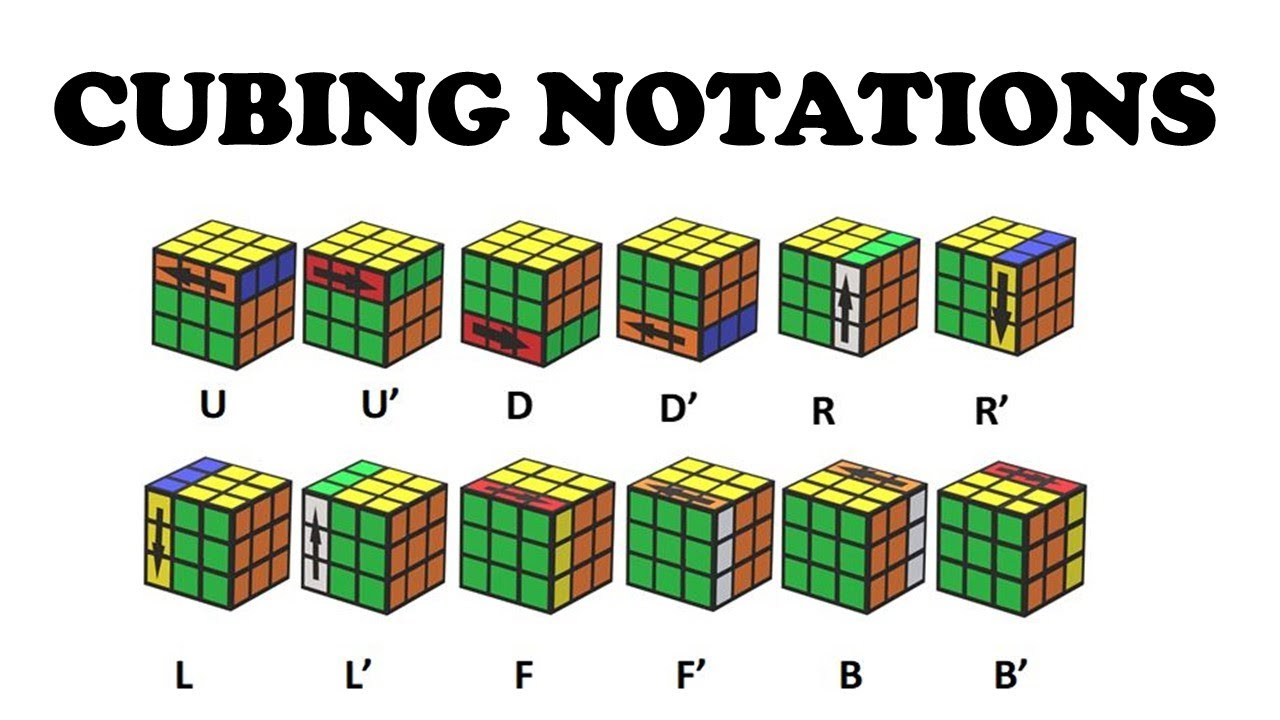

In [141]:
def a_search(rubik):
  closed_list = []
  open_list = []


In [142]:



F = np.array([[0,0,0],[0,0,0],[0,0,0]])
R = F + 1
B = F + 2
L = F + 3
U = F + 4
D = F + 5

rubik = np.array([F,R,B,L,U,D])
rubik = upper_rot(rubik)
rubik = upper_rot(rubik)
rubik = right_rot(rubik)
rubik = upper_rot(rubik)
rubik = upper_rot(rubik)
rubik = right_rot_inv(rubik)
rubik = upper_rot_inv(rubik)
rubik = left_rot(rubik)
rubik = front_rot(rubik)
rubik = back_rot(rubik)
rubik = left_rot(rubik)
rubik = back_rot_inv(rubik)
print(rubik)





[[[4 4 4]
  [2 0 1]
  [5 4 3]]

 [[3 0 5]
  [0 1 1]
  [2 1 1]]

 [[3 0 1]
  [2 2 5]
  [2 2 5]]

 [[4 4 2]
  [3 3 3]
  [3 5 1]]

 [[0 3 2]
  [3 4 4]
  [1 2 0]]

 [[0 1 4]
  [0 5 5]
  [0 5 5]]]


## Image Proccesing 

In [143]:

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [144]:

print(skimage.__version__)


0.18.3


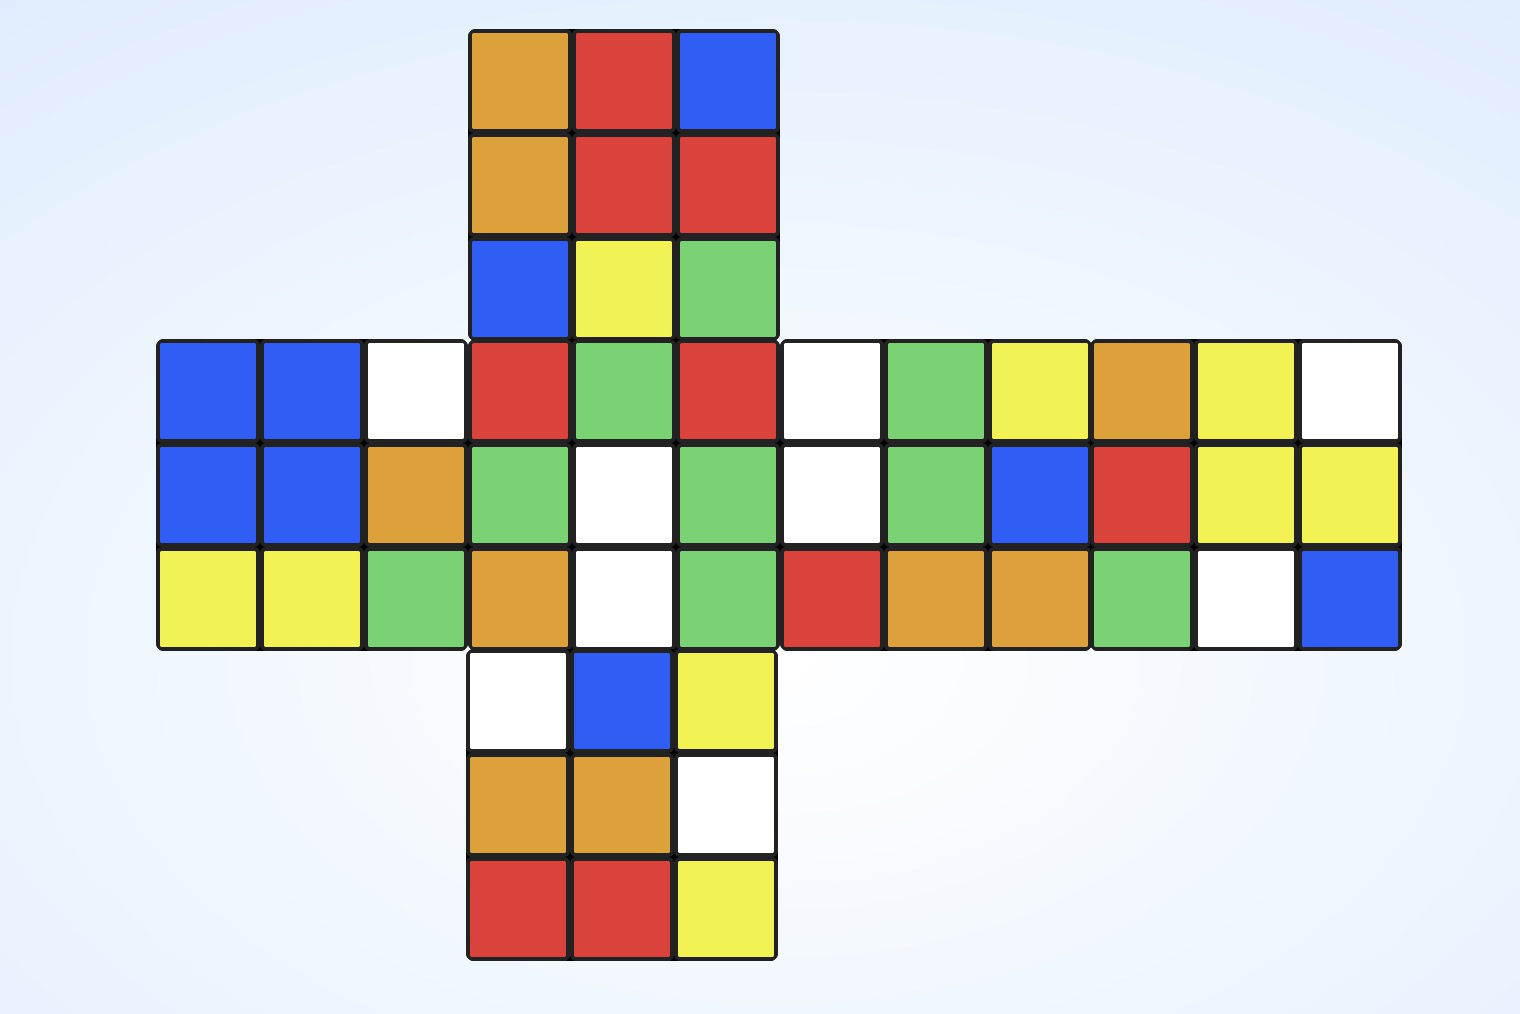

In [146]:


im = Image.open("/content/drive/My Drive/IA/rubik.jpg")

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
im

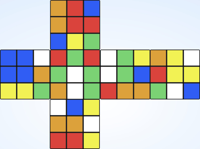

In [147]:
im = trim(im)
im = im.resize((200, 149))
##resis keeping the dimentions


im_array = np.array(im)
im_array.size



im

In [160]:
len(im_array[0])

blue= [ 48, 93, 244]
orange = [220, 161,  59]
red = [218, 67, 60]
green = [123, 210, 116]
white = [255, 255, 255]
yellow = [242, 242, 84]

def count_color_in_array(count_color, array):
  sum = 0
  for color in array:
    if((count_color == color).all()):
      sum = sum + 1
  return sum
def moreFrecuentColor(array_of_pixels):
  counter = 0
  color = array_of_pixels[0]
  for i in array_of_pixels:
    curr_frequency = count_color_in_array(i, array_of_pixels)
    if(curr_frequency > counter):
      counter = curr_frequency
      color = i
  return color


U = np.array([["","",""],["","",""],["","",""]])
L = np.array([["","",""],["","",""],["","",""]])
F = np.array([["","",""],["","",""],["","",""]])
R = np.array([["","",""],["","",""],["","",""]])
B = np.array([["","",""],["","",""],["","",""]])
D = np.array([["","",""],["","",""],["","",""]])


for i in range(0, 9):
  row_chunk = i
  middle_of_row = 8 + i * 16
  print(middle_of_row)
  row = im_array[middle_of_row]
  print('Row: {}'.format(i))
  for j in range(0, 12):
    chunk = j
    start = 0 + (chunk * 16)
    end = 16 + (chunk * 16)
    color_cube = row[start:end]
    pixel = moreFrecuentColor(color_cube)
    #print(pixel)
    color = None
    if((pixel == orange).all()):
      print('Orange')
      color = 'Orange'
    if((pixel == blue).all()):
      print('Blue')
      color = 'Blue'
    if((pixel == red).all()):
      print('Red')
      color = 'Red'
    if((pixel == green).all()):
      print('Green') 
      color = 'Green'
    if((pixel == white).all()):
      print('White')
      color = 'White'
    if((pixel == yellow).all()):
      print('Yellow')
      color = 'Yellow'
    row_idx = i % 3
    col_idx = j % 3
    ## UPPER  FACE
    if(i <= 2 and j >= 3 and j < 6):
      print('color= {}'.format(color))
      U[row_idx][col_idx] = color
    ## LEFT FACE
    if(i > 2 and i < 6 and j < 3):
      print('color= {}'.format(color))
      L[row_idx][col_idx] = color
    ##FRONT FACE
    if(i > 2 and i < 6 and j >= 3 and j < 6):
      print('color= {}'.format(color))
      F[row_idx][col_idx] = color
    ## RIGHT FACE
    if(i > 2 and i < 6 and j >= 6 and j < 9):
      print('color= {}'.format(color))
      R[row_idx][col_idx] = color
    ##BACK FACE
    if(i > 2 and i < 6 and j >= 9):
      print('color= {}'.format(color))
      B[row_idx][col_idx] = color
    ##DOWN FACE
    if(i >= 6 and j >= 3 and j < 6):
      print('color= {}'.format(color))
      D[row_idx][col_idx] = color
  print('---'*20)
print(U)
print(L)
print(F)
print(R)
print(B)
print(D)

8
Row: 0
Orange
color= Orange
Red
color= Red
Blue
color= Blue
------------------------------------------------------------
24
Row: 1
Orange
color= Orange
Red
color= Red
Red
color= Red
------------------------------------------------------------
40
Row: 2
Blue
color= Blue
Yellow
color= Yellow
Green
color= Green
------------------------------------------------------------
56
Row: 3
Blue
color= Blue
Blue
color= Blue
White
color= White
Red
color= Red
Green
color= Green
Red
color= Red
White
color= White
Green
color= Green
Yellow
color= Yellow
Orange
color= Orange
Yellow
color= Yellow
White
color= White
------------------------------------------------------------
72
Row: 4
Blue
color= Blue
Blue
color= Blue
Orange
color= Orange
Green
color= Green
White
color= White
Green
color= Green
White
color= White
Green
color= Green
Blue
color= Blue
Red
color= Red
Yellow
color= Yellow
Yellow
color= Yellow
------------------------------------------------------------
88
Row: 5
Yellow
color= Yellow
Yellow
c